<a href="https://colab.research.google.com/github/Rakesh2711/Deloitte-Exam/blob/master/Deloittev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,GroupKFold 
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRFRegressor
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics, preprocessing, model_selection
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['font.family'] = "DejaVu Sans"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from tqdm import tqdm_notebook
# from urlextract import URLExtract
# import geopandas

import warnings
warnings.filterwarnings("ignore")
import os

# Importing Data

In [0]:
os.chdir('/content/drive/My Drive/Deloitte data')

In [0]:
train=pd.read_csv('train10k.csv')
test=pd.read_csv('test2k.csv')
submission=pd.read_csv('sample_submission2k.csv')

# Missing values Imputations 
### Dropping ---> host_response_rate', 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name'

In [0]:
# # Combine both the dataset for data preprocessing
# test['log_price'] = np.nan
# train['data'] = 'train'
# test['data'] = 'test'
# df = pd.concat([train,test[train.columns]])

In [0]:
train.drop(['host_response_rate', 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name'],axis=1,inplace = True)

test.drop(['host_response_rate', 'first_review', 'last_review','host_since','thumbnail_url','zipcode','name'],axis=1,inplace = True)

In [514]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   log_price               10000 non-null  float64
 2   property_type           10000 non-null  object 
 3   room_type               10000 non-null  object 
 4   amenities               10000 non-null  object 
 5   accommodates            10000 non-null  int64  
 6   bathrooms               9974 non-null   float64
 7   bed_type                10000 non-null  object 
 8   cancellation_policy     10000 non-null  object 
 9   cleaning_fee            10000 non-null  bool   
 10  city                    10000 non-null  object 
 11  description             10000 non-null  object 
 12  host_has_profile_pic    9979 non-null   object 
 13  host_identity_verified  9979 non-null   object 
 14  instant_bookable        10000 non-null 

In [515]:
train.isna().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   26
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_has_profile_pic        21
host_identity_verified      21
instant_bookable             0
latitude                     0
longitude                    0
neighbourhood              939
number_of_reviews            0
review_scores_rating      2286
bedrooms                    14
beds                        23
dtype: int64

 cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable --->Convert these to binary

In [0]:
# Imputing missing values with Other catagory
train['neighbourhood'].fillna('others',inplace =True)
test['neighbourhood'].fillna('others',inplace =True)

In [0]:
col = ['bathrooms','bedrooms','beds']
for col1 in col:
    if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
        train[col1].fillna(train[col1].mean(),inplace=True)
        test[col1].fillna(train[col1].mean(),inplace=True)

In [0]:
def ImputeWithMean(train,test,col):
    for col1 in col:

        if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
            train[col1].fillna(train[col1].mean(),inplace=True)
            test[col1].fillna(train[col1].mean(),inplace=True)

In [0]:
def ImputeWithMedian(train,test,col):
    for col1 in col:

        if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
            train[col1].fillna(train[col1].median(),inplace=True)
            test[col1].fillna(train[col1].median(),inplace=True)

In [0]:
def ImputeWithMode(train,test,col):
    for col1 in col:

        if (train[col1].isna().any() == True) |  test[col1].isna().any() == True:
            train[col1].fillna(train[col1].mode()[0],inplace=True)
            test[col1].fillna(train[col1].mode()[0],inplace=True)

In [0]:
ImputeWithMean(train,test,['bathrooms','bedrooms','beds'])

In [0]:
ImputeWithMode(train,test,['host_has_profile_pic','host_identity_verified'])

In [0]:
def ConvertTFtoBinary(data,col):
    for col1 in col:
        if col1.startswith('cleaning_f'):
            data[col1] = data[col1].astype('int')
        else:
            data[col1] = np.where(data[col1]=='t',1,0)

In [0]:
ConvertTFtoBinary(train,['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable'])

ConvertTFtoBinary(test,['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable'])

In [0]:
ImputeWithMean(train,test,['review_scores_rating'])

### All missing Values are imputed now

In [538]:
test.isna().sum()

id                        0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

# Combine both train and test data

In [0]:
# Combine both the dataset for data preprocessing
test['log_price'] = np.nan
train['data'] = 'train'
test['data'] = 'test'
df = pd.concat([train,test[train.columns]])

In [540]:
# Number of amenites in each stay
%%time
df['number_of_amenities'] = [len(df['amenities'].str.split(',').values[i]) for i in range(len(df['amenities']))]

CPU times: user 7min 49s, sys: 2.55 s, total: 7min 52s
Wall time: 7min 53s


### Dummie variable creation

In [0]:
# Creating dummies for catagorical variables
def CreateDummies(data,cat_var):
    for col in cat_var[:-1]:
        freqs=data[col].value_counts()
        k=freqs.index[freqs>20][:-1]
        for cat in k:
            name=str(col)+'_'+str(cat)
            data[name]=(data[col]==cat).astype(int)
        del data[col]
        print(col)

In [0]:
# Dropping amenities ,Description columns from the Data due to lot of unique values
df.drop(['amenities','description'],axis=1,inplace=True)

In [550]:
cat_var=df.select_dtypes(['object']).columns
print(cat_var)

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'neighbourhood', 'data'],
      dtype='object')


In [551]:
CreateDummies(df , cat_var)

property_type
room_type
bed_type
cancellation_policy
city
neighbourhood


In [552]:
df.head(2)

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,data,number_of_amenities,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,room_type_Entire home/apt,room_type_Private room,bed_type_Real Bed,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Airbed,cancellation_policy_strict,cancellation_policy_flexible,city_NYC,city_LA,city_SF,city_DC,city_Chicago,neighbourhood_others,...,neighbourhood_U Street Corridor,neighbourhood_Gramercy Park,neighbourhood_Roxbury,neighbourhood_Jackson Heights,neighbourhood_Burbank,neighbourhood_Russian Hill,neighbourhood_Highland Park,neighbourhood_East Hollywood,neighbourhood_East Flatbush,neighbourhood_Forest Hills,neighbourhood_Greenwood Heights,neighbourhood_Mid-City,neighbourhood_Inwood,neighbourhood_West Adams,neighbourhood_Wicker Park,neighbourhood_Studio City,neighbourhood_Lower Haight,neighbourhood_Flushing,neighbourhood_North End,neighbourhood_Lincoln Park,neighbourhood_Malibu,neighbourhood_The Rockaways,neighbourhood_Mount Pleasant,neighbourhood_Potrero Hill,neighbourhood_South Beach,neighbourhood_Petworth,neighbourhood_Culver City,neighbourhood_West End,neighbourhood_Marina,neighbourhood_Brentwood,neighbourhood_Long Island City,neighbourhood_Haight-Ashbury,neighbourhood_Redondo Beach,neighbourhood_Uptown,neighbourhood_Ditmars / Steinway,neighbourhood_Manhattan Beach,neighbourhood_Valley Village,neighbourhood_Gowanus,neighbourhood_Windsor Terrace,neighbourhood_Georgetown
0,5506438,4.605170,3,1.0,0,1,1,1,40.859270,-73.929658,0,94.106041,2.0,1.0,train,12,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12343026,5.010635,2,1.0,1,1,1,0,40.738295,-74.006016,0,94.106041,1.0,1.0,train,15,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# plt.rcParams['figure.figsize']=15,8
# sns.heatmap(df.corr())

### Spliting back train and test

In [0]:
# Splitting back the training and test set
df_train = df[df['data'] =='train']
df_test = df[df['data'] =='test']

In [0]:
# Dropping data column it was created only to combine the 2-datasets
df_train.drop('data',axis = 1,inplace=True)
df_test.drop('data',axis = 1,inplace=True)
df_test.drop('log_price',axis = 1,inplace=True)

In [561]:
df_train.shape , df_test.shape

((10000, 175), (2000, 174))

In [562]:
df_train.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,number_of_amenities,property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Loft,property_type_Other,property_type_Guesthouse,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Villa,room_type_Entire home/apt,room_type_Private room,bed_type_Real Bed,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Airbed,cancellation_policy_strict,cancellation_policy_flexible,city_NYC,city_LA,city_SF,city_DC,city_Chicago,neighbourhood_others,neighbourhood_Williamsburg,...,neighbourhood_U Street Corridor,neighbourhood_Gramercy Park,neighbourhood_Roxbury,neighbourhood_Jackson Heights,neighbourhood_Burbank,neighbourhood_Russian Hill,neighbourhood_Highland Park,neighbourhood_East Hollywood,neighbourhood_East Flatbush,neighbourhood_Forest Hills,neighbourhood_Greenwood Heights,neighbourhood_Mid-City,neighbourhood_Inwood,neighbourhood_West Adams,neighbourhood_Wicker Park,neighbourhood_Studio City,neighbourhood_Lower Haight,neighbourhood_Flushing,neighbourhood_North End,neighbourhood_Lincoln Park,neighbourhood_Malibu,neighbourhood_The Rockaways,neighbourhood_Mount Pleasant,neighbourhood_Potrero Hill,neighbourhood_South Beach,neighbourhood_Petworth,neighbourhood_Culver City,neighbourhood_West End,neighbourhood_Marina,neighbourhood_Brentwood,neighbourhood_Long Island City,neighbourhood_Haight-Ashbury,neighbourhood_Redondo Beach,neighbourhood_Uptown,neighbourhood_Ditmars / Steinway,neighbourhood_Manhattan Beach,neighbourhood_Valley Village,neighbourhood_Gowanus,neighbourhood_Windsor Terrace,neighbourhood_Georgetown
0,5506438,4.605170,3,1.0,0,1,1,1,40.859270,-73.929658,0,94.106041,2.0,1.0,12,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12343026,5.010635,2,1.0,1,1,1,0,40.738295,-74.006016,0,94.106041,1.0,1.0,15,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9493786,4.077537,3,1.5,1,0,0,0,40.662847,-73.946532,0,94.106041,1.0,1.0,6,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9961396,5.686975,1,1.0,0,1,0,0,40.796835,-73.970703,0,94.106041,1.0,1.0,14,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4820071,5.991465,3,1.0,1,1,1,0,37.782340,-122.397179,4,90.000000,1.0,1.0,13,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### DATA is Ready for Modelling

In [0]:
df_train, df_val = train_test_split(df_train, test_size = 0.2,random_state=2 ,shuffle = False)

x_train=df_train.drop(["log_price","id"],1)
y_train=df_train["log_price"]
x_test=df_val.drop(["log_price","id"],1)
y_test=df_val["log_price"]

# Random Forest

In [0]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
clf = RandomForestRegressor()

In [0]:
param_dist = {"n_estimators":[100,200,300,400,500],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False], 
                # 'criterion':['mse','mae'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [567]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='neg_mean_squared_error',cv=10 ,verbose = 20)
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.198, total=   4.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.242, total=   4.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.181, total=   4.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.3s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.190, total=   4.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.7s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.192, total=   4.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.1s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.190, total=   4.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   26.6s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.201, total=   4.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   31.0s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.204, total=   4.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   35.4s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.176, total=   4.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   39.9s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=15, bootstrap=False, score=-0.180, total=   4.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   44.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.276, total=   1.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   46.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.323, total=   1.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   48.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.266, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   49.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.258, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   51.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.272, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   53.6s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.278, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   55.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.279, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   57.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.272, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   59.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.253, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.0min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=5, max_depth=10, bootstrap=False, score=-0.259, total=   1.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, bootstrap=True, score=-0.209, total=   0.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, bootstrap=True, score=-0.251, total=   0.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, bootstrap=True, score=-0.187, total=   0.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=10, boot

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [569]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.180 (std: 0.01747)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 25, 'max_depth': 20, 'bootstrap': True}

Model with rank: 2
Mean validation score: -0.183 (std: 0.01779)
Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 20, 'max_depth': 20, 'bootstrap': True}

Model with rank: 3
Mean validation score: -0.186 (std: 0.01782)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 35, 'max_depth': None, 'bootstrap': False}

Model with rank: 4
Mean validation score: -0.188 (std: 0.01765)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 50, 'bootstrap': False}

Model with rank: 5
Mean validation score: -0.195 (std: 0.01778)
Parameters: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 25, 'max_depth': 15, 'b

In [570]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [0]:
rf = RandomForestRegressor(n_estimators= 300,bootstrap= True,max_depth= 20,max_features= 25,min_samples_leaf= 2,
                           min_samples_split= 10)

In [572]:
rf.fit(x_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=25, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [573]:
p_test=rf.predict(x_test)

residual=p_test-y_test

rmse_rf=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_rf

0.4117067152485057

In [574]:
df_pred = pd.DataFrame({'Actual':  y_test,  'Predicted': p_test, })
df_pred.head(5)

,Actual,Predicted
8000,5.991465,5.722012
8001,4.595120,4.598672
8002,6.109248,5.872901
8003,5.105945,5.050048
8004,6.907755,5.353655


# EDA2

In [0]:
train.review_scores_rating.unique

<bound method Series.unique of 5       100.0
8        94.0
9        95.0
10      100.0
15       95.0
        ...  
9994     98.0
9996     96.0
9997     89.0
9998    100.0
9999     98.0
Name: review_scores_rating, Length: 5133, dtype: float64>

In [0]:
# we cn drop name due to lot of unique values as name.
train[['description','review_scores_rating','amenities']].tail(10)

,description,review_scores_rating,amenities
9981,"Rustic & modern, completely renovated self con...",96.0,"{Internet,""Wireless Internet"",""Air conditionin..."
9983,1BR house with gated parking in back of quiet ...,98.0,"{""Wireless Internet"",""Air conditioning"",Kitche..."
9986,Old school New York apartment with high ceilin...,97.0,"{TV,Internet,""Wireless Internet"",""Air conditio..."
9988,"Clean, comfortable big (1750) sq. ft 3 bedroom...",87.0,"{TV,Internet,""Wireless Internet"",""Air conditio..."
9992,City & Beach View Studio. Beachy side of town....,93.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
9994,The Cottage of Lake Balboa is the perfect esca...,98.0,"{TV,Internet,""Wireless Internet"",""Air conditio..."
9996,Private Room in a spacious 2 bedroom walkup lo...,96.0,"{""Wireless Internet"",""Air conditioning"",Kitche..."
9997,"Central AC, individual electric heater, washer...",89.0,"{""Wireless Internet"",""Air conditioning"",Kitche..."
9998,My place is close to Stony Brook Station and a...,100.0,"{""Wireless Internet"",""Air conditioning"",Kitche..."
9999,My 1950's era apartment is full of natural lig...,98.0,"{TV,Internet,""Wireless Internet"",""Air conditio..."


In [0]:
train['description'].nunique()

5126

In [0]:
#These are the columns which we will drop from our data
# Name - Dropping beacause of people wll not see name they will see location,price,reviews
# thumbnail_url - Droping
# Description - over desc people will prefer looking out for review
drop_col = ['name','thumbnail_url','description']

In [0]:
# Dropping above columns
train.drop(drop_col , axis = 1, inplace= True)

In [0]:
df = train.copy()

In [0]:
binary_col = ['host_has_profile_pic','host_identity_verified','instant_bookable']

for col in binary_col:
    df[col] = np.where(df[col]=='t',1,0)

In [0]:
df.cleaning_fee = df.cleaning_fee.astype('int')

In [0]:
for col in train.columns:
    print(col)
    print('\n')
    print(train[col].value_counts())

In [0]:
# Host Response rate --Removing percetage sign from the data

df['host_response_rate'] = df['host_response_rate'].str.replace('%','')

In [0]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_month,host_year,host_day
5,15556066,4.787492,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,Real Bed,flexible,0,NYC,2017-06-15,1,0,100,2015-08-25,0,2017-06-15,40.682714,-73.950323,Bedford-Stuyvesant,1,100.0,11216,2.0,2.0,8,2015,25
8,5326508,6.142037,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,2.0,Real Bed,strict,1,NYC,2016-05-21,1,1,100,2016-03-12,1,2017-09-29,40.730290,-73.980495,East Village,32,94.0,10009.0,2.0,4.0,3,2016,12
9,4967157,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,NYC,2015-10-12,1,1,100,2015-07-03,0,2017-09-29,40.611820,-73.967641,Midwood,24,95.0,11230,1.0,1.0,7,2015,3
10,15627978,4.499810,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",2,1.0,Real Bed,moderate,1,DC,2017-04-20,1,1,100,2013-11-07,0,2017-04-24,38.905768,-77.030565,Logan Circle,2,100.0,20005,1.0,1.0,11,2013,7
15,11410116,4.174387,House,Private room,"{""Wireless Internet"",Kitchen,Heating,Dryer,""Sm...",2,1.0,Real Bed,flexible,1,LA,2016-11-20,1,1,100,2015-12-03,0,2016-12-02,33.990167,-118.409616,Del Rey,4,95.0,90230,1.0,1.0,12,2015,3


In [0]:
# Number of amenites in each stay

df['number_of_amenities'] = [len(df['amenities'].str.split(',').values[i]) for i in range(len(df['amenities']))]

In [0]:
df['number_of_amenities'].value_counts()

20    352
19    342
18    324
16    318
21    296
17    286
14    279
15    278
22    268
13    248
23    235
12    217
24    205
25    158
11    148
26    145
27    117
10    109
28    103
9      90
8      84
29     61
7      52
30     49
31     44
32     39
34     32
33     29
6      24
35     23
40     17
36     14
39     14
2      13
38     13
42     13
5      11
37     10
43      9
49      7
3       7
1       7
4       6
41      6
44      5
45      5
47      4
46      3
50      3
55      3
48      2
57      2
51      2
72      1
62      1
Name: number_of_amenities, dtype: int64

In [0]:
df['f_review_month'] = df['first_review'].dt.month

df['f_review_year'] = df['first_review'].dt.year

df['f_review_day'] = df['first_review'].dt.day

In [0]:
df['l_review_month'] = df['last_review'].dt.month

df['l_review_year'] = df['last_review'].dt.year

df['l_review_day'] = df['last_review'].dt.day

In [0]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_month,host_year,host_day,number_of_amenities,f_review_month,f_review_year,f_review_day,l_review_month,l_review_year,l_review_day
5,15556066,4.787492,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,Real Bed,flexible,0,NYC,2017-06-15,1,0,100,2015-08-25,0,2017-06-15,40.682714,-73.950323,Bedford-Stuyvesant,1,100.0,11216,2.0,2.0,8,2015,25,15,6,2017,15,6,2017,15
8,5326508,6.142037,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,2.0,Real Bed,strict,1,NYC,2016-05-21,1,1,100,2016-03-12,1,2017-09-29,40.730290,-73.980495,East Village,32,94.0,10009.0,2.0,4.0,3,2016,12,27,5,2016,21,9,2017,29
9,4967157,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,NYC,2015-10-12,1,1,100,2015-07-03,0,2017-09-29,40.611820,-73.967641,Midwood,24,95.0,11230,1.0,1.0,7,2015,3,48,10,2015,12,9,2017,29
10,15627978,4.499810,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",2,1.0,Real Bed,moderate,1,DC,2017-04-20,1,1,100,2013-11-07,0,2017-04-24,38.905768,-77.030565,Logan Circle,2,100.0,20005,1.0,1.0,11,2013,7,24,4,2017,20,4,2017,24
15,11410116,4.174387,House,Private room,"{""Wireless Internet"",Kitchen,Heating,Dryer,""Sm...",2,1.0,Real Bed,flexible,1,LA,2016-11-20,1,1,100,2015-12-03,0,2016-12-02,33.990167,-118.409616,Del Rey,4,95.0,90230,1.0,1.0,12,2015,3,13,11,2016,20,12,2016,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5133 entries, 5 to 9999
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5133 non-null   int64         
 1   log_price               5133 non-null   float64       
 2   property_type           5133 non-null   object        
 3   room_type               5133 non-null   object        
 4   amenities               5133 non-null   object        
 5   accommodates            5133 non-null   int64         
 6   bathrooms               5133 non-null   float64       
 7   bed_type                5133 non-null   object        
 8   cancellation_policy     5133 non-null   object        
 9   cleaning_fee            5133 non-null   int64         
 10  city                    5133 non-null   object        
 11  first_review            5133 non-null   datetime64[ns]
 12  host_has_profile_pic    5133 non-null   int64   

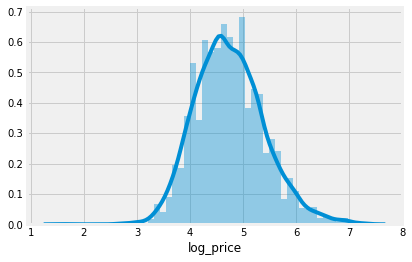

In [0]:
import seaborn as sns
sns.distplot(df['log_price'])

In [0]:
df.drop(['first_review','host_since','last_review','zipcode','amenities'],axis=1,inplace=True)

In [0]:
df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,host_month,host_year,host_day,number_of_amenities,f_review_month,f_review_year,f_review_day,l_review_month,l_review_year,l_review_day
5,15556066,4.787492,Apartment,Entire home/apt,4,1.0,Real Bed,flexible,0,NYC,1,0,100,0,40.682714,-73.950323,Bedford-Stuyvesant,1,100.0,2.0,2.0,8,2015,25,15,6,2017,15,6,2017,15
8,5326508,6.142037,Apartment,Entire home/apt,8,2.0,Real Bed,strict,1,NYC,1,1,100,1,40.730290,-73.980495,East Village,32,94.0,2.0,4.0,3,2016,12,27,5,2016,21,9,2017,29
9,4967157,4.248495,Apartment,Private room,2,1.0,Real Bed,moderate,1,NYC,1,1,100,0,40.611820,-73.967641,Midwood,24,95.0,1.0,1.0,7,2015,3,48,10,2015,12,9,2017,29
10,15627978,4.499810,Apartment,Private room,2,1.0,Real Bed,moderate,1,DC,1,1,100,0,38.905768,-77.030565,Logan Circle,2,100.0,1.0,1.0,11,2013,7,24,4,2017,20,4,2017,24
15,11410116,4.174387,House,Private room,2,1.0,Real Bed,flexible,1,LA,1,1,100,0,33.990167,-118.409616,Del Rey,4,95.0,1.0,1.0,12,2015,3,13,11,2016,20,12,2016,2


Text(0.5, 1.0, 'Room Type vs log_price')

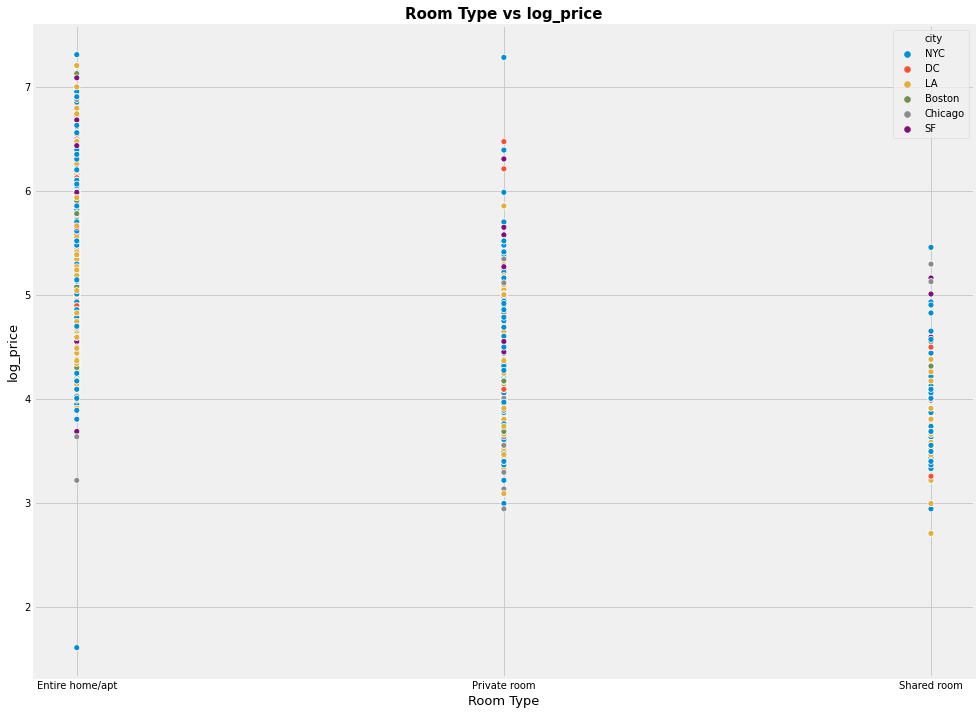

In [0]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='log_price',hue='city', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("log_price", size=13)
plt.title("Room Type vs log_price",size=15, weight='bold')

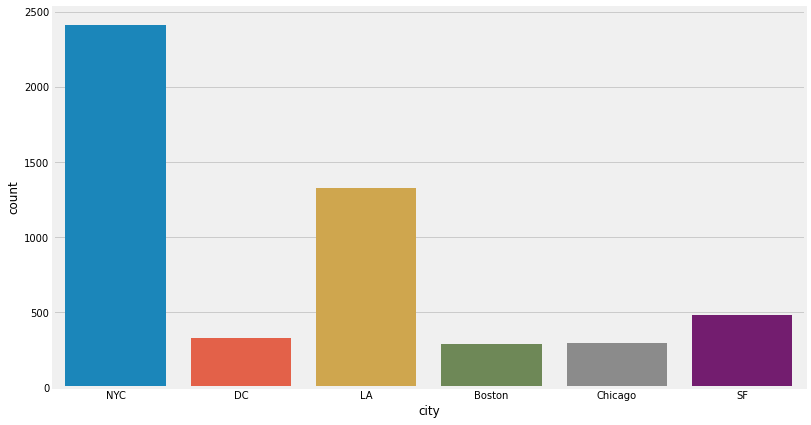

In [0]:
plt.figure(figsize=(12,7))
sns.countplot(x='city' ,data=df)

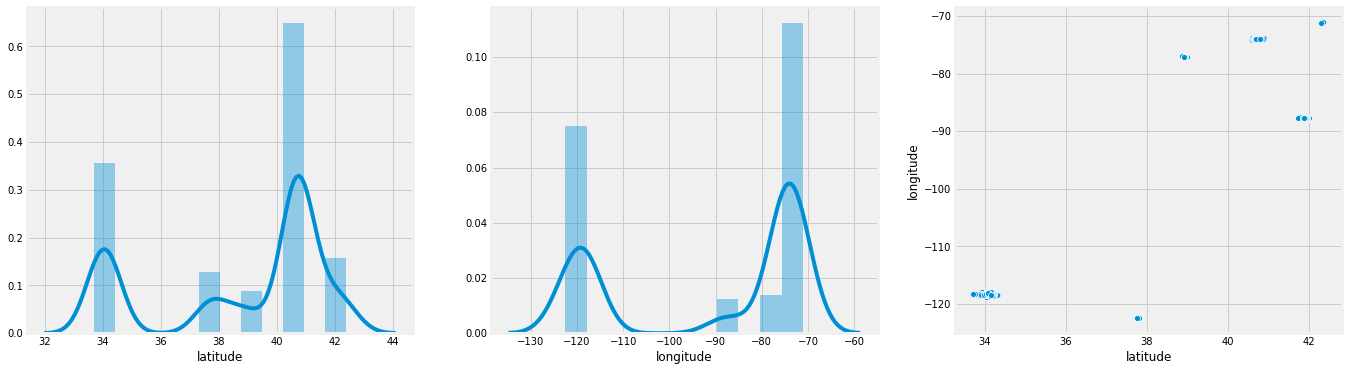

In [0]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['latitude'], ax=axes[0])
sns.distplot(df['longitude'], ax=axes[1])
sns.scatterplot(x= df['latitude'], y=df['longitude'])

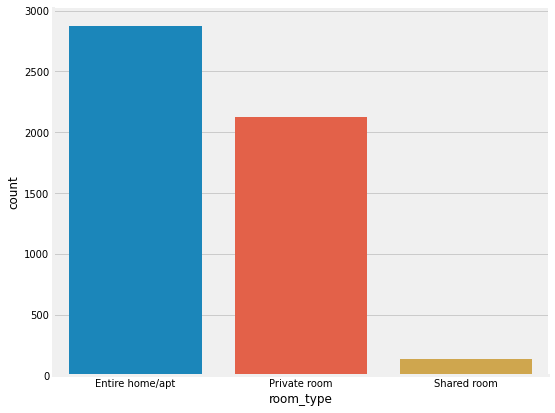

In [0]:
sns.catplot(x='room_type', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(8, 6)

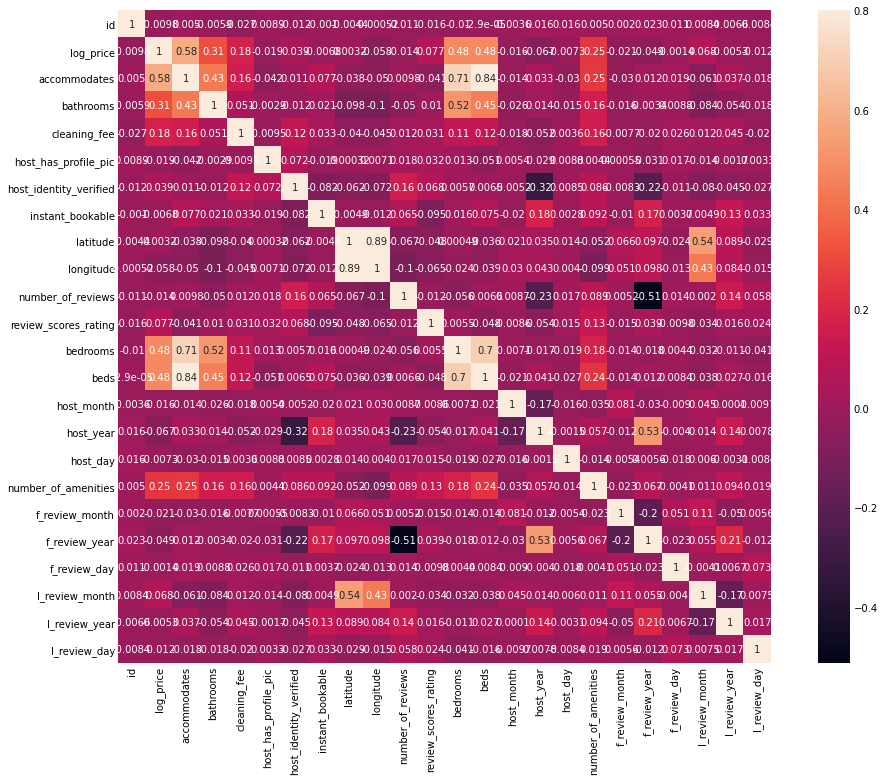

In [0]:
plt.rcParams['figure.figsize']=10,12
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [0]:
# we can see latitude and longitude are highly correlated with each other
# we can see bedrooms,beds and accomodates are highly correlated with each other
# f_review year and number of reviews are higly correated

In [0]:
df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,host_month,host_year,host_day,number_of_amenities,f_review_month,f_review_year,f_review_day,l_review_month,l_review_year,l_review_day
5,15556066,4.787492,Apartment,Entire home/apt,4,1.0,Real Bed,flexible,0,NYC,1,0,100,0,40.682714,-73.950323,Bedford-Stuyvesant,1,100.0,2.0,2.0,8,2015,25,15,6,2017,15,6,2017,15
8,5326508,6.142037,Apartment,Entire home/apt,8,2.0,Real Bed,strict,1,NYC,1,1,100,1,40.730290,-73.980495,East Village,32,94.0,2.0,4.0,3,2016,12,27,5,2016,21,9,2017,29
9,4967157,4.248495,Apartment,Private room,2,1.0,Real Bed,moderate,1,NYC,1,1,100,0,40.611820,-73.967641,Midwood,24,95.0,1.0,1.0,7,2015,3,48,10,2015,12,9,2017,29
10,15627978,4.499810,Apartment,Private room,2,1.0,Real Bed,moderate,1,DC,1,1,100,0,38.905768,-77.030565,Logan Circle,2,100.0,1.0,1.0,11,2013,7,24,4,2017,20,4,2017,24
15,11410116,4.174387,House,Private room,2,1.0,Real Bed,flexible,1,LA,1,1,100,0,33.990167,-118.409616,Del Rey,4,95.0,1.0,1.0,12,2015,3,13,11,2016,20,12,2016,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5133 entries, 5 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5133 non-null   int64  
 1   log_price               5133 non-null   float64
 2   property_type           5133 non-null   object 
 3   room_type               5133 non-null   object 
 4   accommodates            5133 non-null   int64  
 5   bathrooms               5133 non-null   float64
 6   bed_type                5133 non-null   object 
 7   cancellation_policy     5133 non-null   object 
 8   cleaning_fee            5133 non-null   int64  
 9   city                    5133 non-null   object 
 10  host_has_profile_pic    5133 non-null   int64  
 11  host_identity_verified  5133 non-null   int64  
 12  host_response_rate      5133 non-null   object 
 13  instant_bookable        5133 non-null   int64  
 14  latitude                5133 non-null   

In [0]:
# Sepearting catagorical and numerical columns 

cat_columns = [col for col in df.select_dtypes('object') ]

num_columns =df.select_dtypes(['float64','int64']).columns

print(cat_columns)

print('\n')

print(num_columns)

['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'host_response_rate', 'neighbourhood']


Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_month', 'host_year', 'host_day',
       'number_of_amenities', 'f_review_month', 'f_review_year',
       'f_review_day', 'l_review_month', 'l_review_year', 'l_review_day'],
      dtype='object')


In [0]:
categorical_features_one_hot = pd.get_dummies(df[cat_columns])
categorical_features_one_hot.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Vacation home,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,city_Boston,city_Chicago,...,neighbourhood_Venice,neighbourhood_Vinegar Hill,neighbourhood_Visitacion Valley,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_Washington Park,neighbourhood_Wesley Heights,neighbourhood_West Adams,neighbourhood_West Brighton,neighbourhood_West Covina,neighbourhood_West End,neighbourhood_West Hills,neighbourhood_West Hollywood,neighbourhood_West Loop/Greektown,neighbourhood_West Los Angeles,neighbourhood_West Portal,neighbourhood_West Puente Valley,neighbourhood_West Ridge,neighbourhood_West Roxbury,neighbourhood_West Town/Noble Square,neighbourhood_West Village,neighbourhood_Westchester/Playa Del Rey,neighbourhood_Western Addition/NOPA,neighbourhood_Westlake,neighbourhood_Westside,neighbourhood_Westwood,neighbourhood_Whitestone,neighbourhood_Whittier,neighbourhood_Wicker Park,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.drop(cat_columns,axis = 1,inplace = True)

In [0]:
df=pd.concat([df,categorical_features_one_hot],1)

In [0]:
df.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,host_month,host_year,host_day,number_of_amenities,f_review_month,f_review_year,f_review_day,l_review_month,l_review_year,l_review_day,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,...,neighbourhood_Venice,neighbourhood_Vinegar Hill,neighbourhood_Visitacion Valley,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_Washington Park,neighbourhood_Wesley Heights,neighbourhood_West Adams,neighbourhood_West Brighton,neighbourhood_West Covina,neighbourhood_West End,neighbourhood_West Hills,neighbourhood_West Hollywood,neighbourhood_West Loop/Greektown,neighbourhood_West Los Angeles,neighbourhood_West Portal,neighbourhood_West Puente Valley,neighbourhood_West Ridge,neighbourhood_West Roxbury,neighbourhood_West Town/Noble Square,neighbourhood_West Village,neighbourhood_Westchester/Playa Del Rey,neighbourhood_Western Addition/NOPA,neighbourhood_Westlake,neighbourhood_Westside,neighbourhood_Westwood,neighbourhood_Whitestone,neighbourhood_Whittier,neighbourhood_Wicker Park,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
5,15556066,4.787492,4,1.0,0,1,0,0,40.682714,-73.950323,1,100.0,2.0,2.0,8,2015,25,15,6,2017,15,6,2017,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5326508,6.142037,8,2.0,1,1,1,1,40.730290,-73.980495,32,94.0,2.0,4.0,3,2016,12,27,5,2016,21,9,2017,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4967157,4.248495,2,1.0,1,1,1,0,40.611820,-73.967641,24,95.0,1.0,1.0,7,2015,3,48,10,2015,12,9,2017,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,15627978,4.499810,2,1.0,1,1,1,0,38.905768,-77.030565,2,100.0,1.0,1.0,11,2013,7,24,4,2017,20,4,2017,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,11410116,4.174387,2,1.0,1,1,1,0,33.990167,-118.409616,4,95.0,1.0,1.0,12,2015,3,13,11,2016,20,12,2016,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#All columns are converted to numeric now
df.select_dtypes('object')

""
5
8
9
10
15
...
9994
9996
9997
9998


In [0]:
#  from sklearn.preprocessing import StandardScaler
#  sc = StandardScaler()
#  sc.fit(df.drop(['log_price'],1))
#  sc.transform(df.drop(['log_price'],1))

In [0]:
df.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,host_month,host_year,host_day,number_of_amenities,f_review_month,f_review_year,f_review_day,l_review_month,l_review_year,l_review_day,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,...,neighbourhood_Venice,neighbourhood_Vinegar Hill,neighbourhood_Visitacion Valley,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_Washington Park,neighbourhood_Wesley Heights,neighbourhood_West Adams,neighbourhood_West Brighton,neighbourhood_West Covina,neighbourhood_West End,neighbourhood_West Hills,neighbourhood_West Hollywood,neighbourhood_West Loop/Greektown,neighbourhood_West Los Angeles,neighbourhood_West Portal,neighbourhood_West Puente Valley,neighbourhood_West Ridge,neighbourhood_West Roxbury,neighbourhood_West Town/Noble Square,neighbourhood_West Village,neighbourhood_Westchester/Playa Del Rey,neighbourhood_Western Addition/NOPA,neighbourhood_Westlake,neighbourhood_Westside,neighbourhood_Westwood,neighbourhood_Whitestone,neighbourhood_Whittier,neighbourhood_Wicker Park,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
5,15556066,4.787492,4,1.0,0,1,0,0,40.682714,-73.950323,1,100.0,2.0,2.0,8,2015,25,15,6,2017,15,6,2017,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5326508,6.142037,8,2.0,1,1,1,1,40.730290,-73.980495,32,94.0,2.0,4.0,3,2016,12,27,5,2016,21,9,2017,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4967157,4.248495,2,1.0,1,1,1,0,40.611820,-73.967641,24,95.0,1.0,1.0,7,2015,3,48,10,2015,12,9,2017,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,15627978,4.499810,2,1.0,1,1,1,0,38.905768,-77.030565,2,100.0,1.0,1.0,11,2013,7,24,4,2017,20,4,2017,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,11410116,4.174387,2,1.0,1,1,1,0,33.990167,-118.409616,4,95.0,1.0,1.0,12,2015,3,13,11,2016,20,12,2016,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Baseline Model with dropping all the columns which have missing values

In [100]:
submission.head()

,id,log_price
0,20655777,1
1,13725995,1
2,20523808,1
3,629855,1
4,747605,1


In [101]:
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,1.000000e+04,10000.000000,10000.00000,9974.000000,10000.000000,10000.000000,10000.000000,7714.000000,9986.000000,9977.000000
mean,1.121862e+07,4.790830,3.14660,1.240525,38.426223,-92.481286,20.532900,94.106041,1.261065,1.705823
std,6.086583e+06,0.719634,2.15573,0.590796,3.078567,21.710604,36.447603,7.929820,0.846945,1.215609
min,3.362000e+03,1.609438,1.00000,0.000000,33.343287,-122.510940,0.000000,20.000000,0.000000,1.000000
25%,6.185343e+06,4.317488,2.00000,1.000000,34.127979,-118.343094,1.000000,92.000000,1.000000,1.000000
50%,1.220670e+07,4.744932,2.00000,1.000000,40.659715,-77.001433,6.000000,96.000000,1.000000,1.000000
75%,1.635534e+07,5.220356,4.00000,1.000000,40.745598,-73.954729,23.000000,100.000000,1.000000,2.000000
max,2.120388e+07,7.569412,16.00000,8.000000,42.390437,-70.985047,530.000000,100.000000,8.000000,16.000000


In [102]:
train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [103]:
for col in train.columns:
    print(col)
    print('\n')
    print(train[col].value_counts())

id


12947454    1
16547253    1
17239723    1
20843971    1
16063937    1
           ..
16308886    1
19466900    1
3125907     1
992891      1
8281370     1
Name: id, Length: 10000, dtype: int64
log_price


5.010635    379
4.605170    356
4.094345    264
4.317488    259
3.912023    254
           ... 
5.313206      1
6.998510      1
6.011267      1
6.484635      1
6.572283      1
Name: log_price, Length: 461, dtype: int64
property_type


Apartment             6604
House                 2217
Condominium            376
Townhouse              226
Loft                   166
Other                   85
Guesthouse              71
Bed & Breakfast         60
Bungalow                57
Villa                   32
Guest suite             19
Dorm                    15
Cabin                   13
Camper/RV               12
Boutique hotel           9
Timeshare                8
Hostel                   8
In-law                   5
Boat                     5
Tent                     2
Serviced apartme

In [104]:
train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [105]:
train.isna().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   26
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              2171
host_has_profile_pic        21
host_identity_verified      21
host_response_rate        2509
host_since                  21
instant_bookable             0
last_review               2167
latitude                     0
longitude                    0
name                         0
neighbourhood              939
number_of_reviews            0
review_scores_rating      2286
thumbnail_url             1104
zipcode                    130
bedrooms                    14
beds                        23
dtype: int64

In [106]:
test.isna().sum()

id                          0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   7
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
first_review              408
host_has_profile_pic        4
host_identity_verified      4
host_response_rate        509
host_since                  4
instant_bookable            0
last_review               407
latitude                    0
longitude                   0
name                        1
neighbourhood             191
number_of_reviews           0
review_scores_rating      426
thumbnail_url             236
zipcode                    27
bedrooms                    2
beds                        2
dtype: int64

In [0]:
train.dropna(axis=1,inplace = True)
test.dropna(axis =1 ,inplace = True)

In [108]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'city', 'description', 'instant_bookable', 'latitude', 'longitude',
       'name', 'number_of_reviews'],
      dtype='object')

In [109]:
test.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'instant_bookable', 'latitude', 'longitude',
       'number_of_reviews'],
      dtype='object')

In [110]:
train.shape ,test.shape

((10000, 16), (2000, 14))

In [111]:
for col in train.columns:
    print(col)

id
log_price
property_type
room_type
amenities
accommodates
bed_type
cancellation_policy
cleaning_fee
city
description
instant_bookable
latitude
longitude
name
number_of_reviews


In [112]:
for col in test.columns:
    print(col)

id
property_type
room_type
amenities
accommodates
bed_type
cancellation_policy
cleaning_fee
city
description
instant_bookable
latitude
longitude
number_of_reviews


In [0]:
train.drop('name',axis =1 ,inplace=True)

In [114]:
train.shape ,test.shape

((10000, 15), (2000, 14))

In [115]:

train.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,latitude,longitude,number_of_reviews
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,Real Bed,flexible,False,NYC,Large apartment with a lot of natural light ne...,t,40.859270,-73.929658,0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,Real Bed,flexible,True,NYC,This is a true one-bedroom apartment in the be...,f,40.738295,-74.006016,0


In [116]:
test.head(2)

,id,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,latitude,longitude,number_of_reviews
0,6375849,Bungalow,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,Real Bed,strict,True,LA,"Centrally located, this warm and inviting back...",f,34.041205,-118.375735,2
1,4188426,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,Real Bed,strict,True,LA,Hidden up in the hills of Silverlake and Echo ...,f,34.085591,-118.264554,74


In [0]:
test['data'] = 'test'
train['data'] = 'train'
test['log_price'] = np.nan

In [0]:
df = pd.concat([train,test[train.columns]],axis=0)

In [119]:
df.head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,latitude,longitude,number_of_reviews,data
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,Real Bed,flexible,False,NYC,Large apartment with a lot of natural light ne...,t,40.859270,-73.929658,0,train
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,Real Bed,flexible,True,NYC,This is a true one-bedroom apartment in the be...,f,40.738295,-74.006016,0,train
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,Real Bed,moderate,True,NYC,My place is close to Prospect Park and Phat Al...,f,40.662847,-73.946532,0,train


In [120]:
df.select_dtypes('object').columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'instant_bookable',
       'data'],
      dtype='object')

In [69]:
# test.select_dtypes('object').columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'instant_bookable'],
      dtype='object')

In [0]:
dummies = pd.get_dummies(df[['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'instant_bookable']])

df = pd.concat([df,dummies],axis=1)

df.head()

df.drop(['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'description', 'instant_bookable','amenities'],axis = 1,inplace = True)

In [122]:
df.head(2)

,id,log_price,accommodates,cleaning_fee,latitude,longitude,number_of_reviews,data,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_f,instant_bookable_t
0,5506438,4.605170,3,False,40.859270,-73.929658,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,12343026,5.010635,2,True,40.738295,-74.006016,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0


In [0]:
# dummies = pd.get_dummies(test[['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'instant_bookable']])

# test = pd.concat([test,dummies],axis=1)

# test.head()

# test.drop(['property_type', 'room_type', 'bed_type','cancellation_policy', 'city', 'description', 'instant_bookable','amenities'],axis = 1,inplace = True)

In [41]:
test.columns

Index(['id', 'accommodates', 'cleaning_fee', 'latitude', 'longitude',
       'number_of_reviews', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Treehouse',
       'property_type_Villa', 'property_type_Yurt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellati

In [0]:
# train['cleaning_fee'] = train['cleaning_fee'].astype('int')

df['cleaning_fee'] = df['cleaning_fee'].astype('int')

In [125]:
df.head(2)

,id,log_price,accommodates,cleaning_fee,latitude,longitude,number_of_reviews,data,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_f,instant_bookable_t
0,5506438,4.605170,3,0,40.859270,-73.929658,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,12343026,5.010635,2,1,40.738295,-74.006016,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0


In [73]:
train.shape,test.shape

((10000, 56), (2000, 47))

In [0]:
train = df[df['data'] == 'train']

test = df[df['data'] == 'test']


In [140]:
train.shape , test.shape

((10000, 58), (2000, 58))

In [0]:
train.drop('data',axis=1 ,inplace=True)
test.drop('data',axis=1 ,inplace=True)

# **Second Approach**

In [0]:
train.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,False,NYC,Large apartment with a lot of natural light ne...,NaN,t,t,NaN,2011-12-21,t,NaN,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,NaN,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,NYC,This is a true one-bedroom apartment in the be...,NaN,t,t,NaN,2013-12-23,f,NaN,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,NaN,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0


In [0]:
test.head(2)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6375849,Bungalow,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,True,LA,"Centrally located, this warm and inviting back...",2017-01-09,t,f,100%,2016-12-12,f,2017-04-23,34.041205,-118.375735,Cozy and Private Back-House,NaN,2,100.0,https://a0.muscache.com/im/pictures/3f8b790f-3...,90034.0,1.0,2.0
1,4188426,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,LA,Hidden up in the hills of Silverlake and Echo ...,2012-03-19,t,t,100%,2011-10-30,f,2015-05-12,34.085591,-118.264554,Spa Bathroom and Gorgeous Garden,Echo Park,74,95.0,NaN,90026.0,1.0,1.0


In [0]:
# Combine both the dataset for data preprocessing
test['log_price'] = np.nan
train['data'] = 'train'
test['data'] = 'test'
df = pd.concat([train,test[train.columns]])

In [0]:
df.shape,train.shape,test.shape

((12000, 30), (10000, 30), (2000, 30))

In [0]:
df.tail(3)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,data
1997,7480853,NaN,House,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,1.0,Real Bed,flexible,True,LA,Designed 1920s California Bungalow in the Hear...,2016-09-26,t,f,100%,2016-01-03,f,2017-01-02,34.116813,-118.204684,Charming 1920s California Bungalow near York Blvd,Highland Park,13,100.0,https://a0.muscache.com/im/pictures/6332a549-5...,90042,1.0,2.0,test
1998,14520287,NaN,Apartment,Shared room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.0,Real Bed,moderate,True,NYC,Beautiful Chic Studio in Murray Hill; the shar...,2015-09-28,t,t,NaN,2015-03-05,f,2016-11-06,40.744436,-73.971738,Beautiful Chic Studio,Murray Hill,7,100.0,https://a0.muscache.com/im/pictures/69247911/2...,10016,1.0,1.0,test
1999,798100,NaN,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,"One bedroom apartment in Encino, CA! Quiet nei...",2016-07-20,t,f,NaN,2014-11-18,f,2016-07-20,34.172385,-118.525522,Charming Encino apartment,NaN,1,NaN,https://a0.muscache.com/im/pictures/da2a6f2c-b...,91316,1.0,1.0,test


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12000 non-null  int64  
 1   log_price               10000 non-null  float64
 2   property_type           12000 non-null  object 
 3   room_type               12000 non-null  object 
 4   amenities               12000 non-null  object 
 5   accommodates            12000 non-null  int64  
 6   bathrooms               11967 non-null  float64
 7   bed_type                12000 non-null  object 
 8   cancellation_policy     12000 non-null  object 
 9   cleaning_fee            12000 non-null  bool   
 10  city                    12000 non-null  object 
 11  description             12000 non-null  object 
 12  first_review            9421 non-null   object 
 13  host_has_profile_pic    11975 non-null  object 
 14  host_identity_verified  11975 non-null 

In [0]:
# We can see we have lot of columns with missing values
df.isna().sum()/len(df)*100

id                         0.000000
log_price                 16.666667
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.275000
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.491667
host_has_profile_pic       0.208333
host_identity_verified     0.208333
host_response_rate        25.150000
host_since                 0.208333
instant_bookable           0.000000
last_review               21.450000
latitude                   0.000000
longitude                  0.000000
name                       0.008333
neighbourhood              9.416667
number_of_reviews          0.000000
review_scores_rating      22.600000
thumbnail_url             11.166667
zipcode                    1.308333
bedrooms                   0

In [0]:
#check for missing data, and output columns that have missing data and number of missing data
for col in df:
    if df[col].isna().sum()>0:
        print(col , df[col].isna().sum())

log_price 2000
bathrooms 33
first_review 2579
host_has_profile_pic 25
host_identity_verified 25
host_response_rate 3018
host_since 25
last_review 2574
name 1
neighbourhood 1130
review_scores_rating 2712
thumbnail_url 1340
zipcode 157
bedrooms 16
beds 25


In [0]:
plt.rcParams['figure.figsize'] = 15,8
fig, ax =plt.subplots(2,2)
ax = ax.T.flatten() # To make it one dimensional array the then iterate it though to plot
for col , i in zip(['host_has_profile_pic','host_identity_verified','instant_bookable','cleaning_fee'],range(0,4)):
    sns.countplot(df[col], ax=ax[i])
plt.show()

In [0]:
plt.rcParams['figure.figsize'] = 12,6
sns.distplot(df['bathrooms'] , kde = False )
plt.show()

# Feature Engineering

In [0]:
# Number of amenites in each stay
%%time
df['number_of_amenities'] = [len(df['amenities'].str.split(',').values[i]) for i in range(len(df['amenities']))]

In [0]:
# Need to converto to datetime as these are assigned as Catagorical variables
df['host_since'] = df['host_since'].astype('datetime64[ns]')
df['first_review'] = df['first_review'].astype('datetime64[ns]')
df['last_review'] = df['last_review'].astype('datetime64[ns]')

In [0]:
# Extracting year, month and Day from given data
def ExtractDate(df , column):
    df[column+"_year"] = df[column].apply(lambda x :x.year) 
    df[column+"_month"] = df[column].apply(lambda x :x.month)
    df[column+"_day"] = df[column].apply(lambda x :x.day)

In [0]:
ExtractDate(df ,'host_since')

# Missing Value imputations Not improving RMSE

In [0]:
# Imputing bathrooms with median of the variable
df['bathrooms'][df['bathrooms'].isna()] = df['bathrooms'].median()

In [0]:
df['first_review'].values,df['last_review'].values,df['host_since'].values

(array([                          'NaT',                           'NaT',
                                  'NaT', ...,
        '2016-09-26T00:00:00.000000000', '2015-09-28T00:00:00.000000000',
        '2016-07-20T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([                          'NaT',                           'NaT',
                                  'NaT', ...,
        '2017-01-02T00:00:00.000000000', '2016-11-06T00:00:00.000000000',
        '2016-07-20T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2011-12-21T00:00:00.000000000', '2013-12-23T00:00:00.000000000',
        '2016-05-11T00:00:00.000000000', ...,
        '2016-01-03T00:00:00.000000000', '2015-03-05T00:00:00.000000000',
        '2014-11-18T00:00:00.000000000'], dtype='datetime64[ns]'))

In [0]:
# These 3 columns have t and f values
binary_col = ['host_has_profile_pic','host_identity_verified','instant_bookable']

for col in binary_col:
    df[col] = np.where(df[col]=='t',1,0)

In [0]:
# This is having True and False as values
df['cleaning_fee'] = df['cleaning_fee'].astype('int')

In [0]:
#check for missing data, and output columns that have missing data and number of missing data
for col in df:
    if df[col].isna().sum()>0:
        print(col , df[col].isna().sum())

log_price 2000
first_review 2579
host_response_rate 3018
host_since 25
last_review 2574
name 1
neighbourhood 1130
review_scores_rating 2712
thumbnail_url 1340
zipcode 157
bedrooms 16
beds 25
host_since_year 25
host_since_month 25
host_since_day 25


In [0]:
# replacing % sign from values
df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

In [0]:
# Imputing missing values with Median
df['host_response_rate'][df['host_response_rate'].isna()] = df['host_response_rate'].median()

In [0]:
df['review_scores_rating'].value_counts()

sns.distplot(df['review_scores_rating'])

print(df['review_scores_rating'].median())

df['review_scores_rating'].fillna(df['review_scores_rating'].median(),inplace = True)

96.0


In [0]:
# Imputing missing values with Other catagory
df['neighbourhood'].fillna('others',inplace =True)

In [0]:
#check for missing data, and output columns that have missing data and number of missing data
for col in df:
    if df[col].isna().sum()>0:
        print(col , df[col].isna().sum())

log_price 2000
first_review 2579
host_since 25
last_review 2574
name 1
thumbnail_url 1340
zipcode 157
bedrooms 16
beds 25
host_since_year 25
host_since_month 25
host_since_day 25


In [0]:
df['bedrooms'].values
sns.countplot(x = df['bedrooms'])
print(df['bedrooms'].median())

# Fill na with median
df['bedrooms'].fillna(df['bedrooms'].median(),inplace = True)

1.0


In [0]:
df['beds'].values
sns.countplot(x = df['beds'])
print(df['beds'].median())

# Fill na with median
df['beds'].fillna(df['beds'].median(),inplace = True)

1.0


In [0]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,data,host_since_year,host_since_month,host_since_day
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,0,NYC,Large apartment with a lot of natural light ne...,NaT,1,1,100.0,2011-12-21,1,NaT,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,96.0,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0,train,2011.0,12.0,21.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,1,NYC,This is a true one-bedroom apartment in the be...,NaT,1,1,100.0,2013-12-23,0,NaT,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,96.0,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0,train,2013.0,12.0,23.0
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,1.5,Real Bed,moderate,1,NYC,My place is close to Prospect Park and Phat Al...,NaT,0,0,0.0,2016-05-11,0,NaT,40.662847,-73.946532,2. Private Room with nice queen bed,East Flatbush,0,96.0,https://a0.muscache.com/im/pictures/756d845e-3...,11225,1.0,1.0,train,2016.0,5.0,11.0
3,9961396,5.686975,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",1,1.0,Real Bed,flexible,0,NYC,Upper West Side private 1 bedroom fully furnis...,NaT,1,0,100.0,2015-09-15,0,NaT,40.796835,-73.970703,Upper West Side Large Private Bdrm,Upper West Side,0,96.0,https://a0.muscache.com/im/pictures/106971386/...,10025,1.0,1.0,train,2015.0,9.0,15.0
4,4820071,5.991465,Apartment,Entire home/apt,"{TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/...",3,1.0,Real Bed,strict,1,SF,"1 bed, 1 bath in Downtown SF near Union Square...",2015-09-17,1,1,100.0,2015-09-06,0,2015-11-06,37.782340,-122.397179,GREAT location!!!!,SoMa,4,90.0,https://a0.muscache.com/im/pictures/105087954/...,94107,1.0,1.0,train,2015.0,9.0,6.0


In [0]:
df['host_since_year'].fillna(df['host_since_year'].mode()[0],inplace = True)
df['host_since_month'].fillna(df['host_since_month'].mode()[0],inplace = True)
df['host_since_day'].fillna(df['host_since_day'].mode()[0],inplace = True)

# EDA

In [0]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,data,host_since_year,host_since_month,host_since_day
0,5506438,4.605170,Apartment,Entire home/apt,"{""Wireless Internet"",""Wheelchair accessible"",K...",3,1.0,Real Bed,flexible,0,NYC,Large apartment with a lot of natural light ne...,NaT,1,1,100.0,2011-12-21,1,NaT,40.859270,-73.929658,Spacious 1 Bd. Apt. Inwood near Fort Tryon Park,Washington Heights,0,96.0,https://a0.muscache.com/im/pictures/8d65b600-3...,10040,2.0,1.0,train,2011.0,12.0,21.0
1,12343026,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,1,NYC,This is a true one-bedroom apartment in the be...,NaT,1,1,100.0,2013-12-23,0,NaT,40.738295,-74.006016,Lovely 1BR West Village Apartment,West Village,0,96.0,https://a0.muscache.com/im/pictures/9c1b8f62-1...,10014,1.0,1.0,train,2013.0,12.0,23.0
2,9493786,4.077537,House,Private room,"{""Wireless Internet"",Kitchen,""Free parking on ...",3,1.5,Real Bed,moderate,1,NYC,My place is close to Prospect Park and Phat Al...,NaT,0,0,0.0,2016-05-11,0,NaT,40.662847,-73.946532,2. Private Room with nice queen bed,East Flatbush,0,96.0,https://a0.muscache.com/im/pictures/756d845e-3...,11225,1.0,1.0,train,2016.0,5.0,11.0
3,9961396,5.686975,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",1,1.0,Real Bed,flexible,0,NYC,Upper West Side private 1 bedroom fully furnis...,NaT,1,0,100.0,2015-09-15,0,NaT,40.796835,-73.970703,Upper West Side Large Private Bdrm,Upper West Side,0,96.0,https://a0.muscache.com/im/pictures/106971386/...,10025,1.0,1.0,train,2015.0,9.0,15.0
4,4820071,5.991465,Apartment,Entire home/apt,"{TV,Pool,Kitchen,Gym,Elevator,Heating,""Family/...",3,1.0,Real Bed,strict,1,SF,"1 bed, 1 bath in Downtown SF near Union Square...",2015-09-17,1,1,100.0,2015-09-06,0,2015-11-06,37.782340,-122.397179,GREAT location!!!!,SoMa,4,90.0,https://a0.muscache.com/im/pictures/105087954/...,94107,1.0,1.0,train,2015.0,9.0,6.0


In [0]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=df['latitude'],x=df['longitude'],hue=df['neighbourhood'])
plt.legend('')

In [0]:
sns.FacetGrid(df,col='room_type').map(sns.kdeplot,'log_price').add_legend()
plt.show()

In [0]:
sns.distplot(df['host_response_rate'],kde=True)

In [0]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).T

,unique
property_type,"[Apartment, House, Timeshare, Villa, Condominium, Townhouse, Loft, Serviced apartment, Bungalow, Boutique hotel, Guest suite, Other, Guesthouse, Bed & Breakfast, Camper/RV, Castle, Cabin, Hostel, Boat, Tipi, Dorm, Tent, Chalet, In-law, Cave, Earth House, Vacation home, Treehouse, Yurt]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[flexible, moderate, strict, super_strict_30, super_strict_60]"
cleaning_fee,"[0, 1]"
city,"[NYC, SF, LA, DC, Boston, Chicago]"
host_has_profile_pic,"[1, 0]"
host_identity_verified,"[1, 0]"
host_response_rate,"[100.0, 0.0, 99.0, 91.0, 80.0, 98.0, 63.0, 60.0, 90.0, 83.0, 89.0, 10.0, 66.0, 81.0, 85.0, 95.0, 94.0, 96.0, 38.0, 93.0, 86.0, 97.0, 67.0, 50.0, 75.0, 77.0, 58.0, 74.0, 88.0, 25.0, 71.0, 20.0, 92.0, 82.0, 70.0, 33.0, 14.0, 64.0, 44.0, 79.0, 54.0, 23.0, 69.0, 76.0, 78.0, 73.0, 84.0, 29.0, 57.0, 56.0, 52.0, 65.0, 43.0, 87.0, 30.0, 40.0, 72.0, 17.0, 47.0, 68.0, 62.0, 55.0, 26.0, 61.0, 53.0, 27.0, 15.0]"
instant_bookable,"[1, 0]"


In [0]:
pd.set_option('display.max_colwidth',10)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,data,host_since_year,host_since_month,host_since_day
0,5506438,4.605170,Apartment,Entire...,"{""Wire...",3,1.0,Real Bed,flexible,0,NYC,Large ...,NaT,1,1,100.0,2011-12-21,1,NaT,40.859270,-73.929658,Spacio...,Washin...,0,96.0,https:...,10040,2.0,1.0,train,2011.0,12.0,21.0
1,12343026,5.010635,Apartment,Entire...,"{TV,""C...",2,1.0,Real Bed,flexible,1,NYC,This i...,NaT,1,1,100.0,2013-12-23,0,NaT,40.738295,-74.006016,Lovely...,West V...,0,96.0,https:...,10014,1.0,1.0,train,2013.0,12.0,23.0
2,9493786,4.077537,House,Privat...,"{""Wire...",3,1.5,Real Bed,moderate,1,NYC,My pla...,NaT,0,0,0.0,2016-05-11,0,NaT,40.662847,-73.946532,2. Pri...,East F...,0,96.0,https:...,11225,1.0,1.0,train,2016.0,5.0,11.0
3,9961396,5.686975,Apartment,Entire...,"{""Cabl...",1,1.0,Real Bed,flexible,0,NYC,Upper ...,NaT,1,0,100.0,2015-09-15,0,NaT,40.796835,-73.970703,Upper ...,Upper ...,0,96.0,https:...,10025,1.0,1.0,train,2015.0,9.0,15.0
4,4820071,5.991465,Apartment,Entire...,"{TV,Po...",3,1.0,Real Bed,strict,1,SF,"1 bed,...",2015-09-17,1,1,100.0,2015-09-06,0,2015-11-06,37.782340,-122.39...,GREAT ...,SoMa,4,90.0,https:...,94107,1.0,1.0,train,2015.0,9.0,6.0


In [0]:
print(df.groupby(['city'])['log_price'].mean())
print('\n')
df.groupby(['city'])['log_price'].mean().plot(kind='bar',color = '#557f2d',figsize=(12,6),width=0.25)
plt.show()

city
Boston     4.878308
Chicago    4.682394
DC         5.035197
LA         4.720197
NYC        4.717296
SF         5.197816
Name: log_price, dtype: float64




In [0]:
print(df.groupby(['room_type'])['log_price'].mean())
print('\n')
df.groupby(['room_type'])['log_price'].mean().plot(kind = 'bar')
plt.show()

room_type
Entire home/apt    5.174810
Private room       4.336024
Shared room        3.912781
Name: log_price, dtype: float64




In [0]:
print(df.groupby(['property_type'])['log_price'].mean())
print('\n')
df.groupby(['property_type'])['log_price'].mean().plot(kind = 'bar')
plt.show()

property_type
Apartment             4.767573
Bed & Breakfast       4.528958
Boat                  5.665308
Boutique hotel        4.799852
Bungalow              4.745602
Cabin                 4.929558
Camper/RV             4.778741
Castle                5.991465
Cave                  4.990433
Chalet                4.343805
Condominium           5.062759
Dorm                  3.787140
Earth House           4.442651
Guest suite           4.533088
Guesthouse            4.642296
Hostel                4.014886
House                 4.792040
In-law                4.298726
Loft                  5.023434
Other                 4.941533
Serviced apartment    4.999399
Tent                  5.053214
Timeshare             5.639102
Tipi                  4.465908
Townhouse             4.895080
Treehouse             4.605170
Vacation home         5.578125
Villa                 5.279067
Yurt                       NaN
Name: log_price, dtype: float64




In [0]:
df['property_type'].value_counts(dropna=False)

Apartment             7880
House                 2701
Condominium            454
Townhouse              267
Loft                   209
Other                  103
Guesthouse              85
Bed & Breakfast         72
Bungalow                63
Villa                   36
Guest suite             25
Dorm                    20
Camper/RV               14
Cabin                   13
Hostel                  10
Boutique hotel          10
In-law                   9
Timeshare                9
Boat                     6
Tent                     2
Serviced apartment       2
Vacation home            2
Treehouse                2
Cave                     1
Chalet                   1
Castle                   1
Earth House              1
Yurt                     1
Tipi                     1
Name: property_type, dtype: int64

In [0]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,data,host_since_year,host_since_month,host_since_day
0,5506438,4.605170,Apartment,Entire...,"{""Wire...",3,1.0,Real Bed,flexible,0,NYC,Large ...,NaT,1,1,100.0,2011-12-21,1,NaT,40.859270,-73.929658,Spacio...,Washin...,0,96.0,https:...,10040,2.0,1.0,train,2011.0,12.0,21.0
1,12343026,5.010635,Apartment,Entire...,"{TV,""C...",2,1.0,Real Bed,flexible,1,NYC,This i...,NaT,1,1,100.0,2013-12-23,0,NaT,40.738295,-74.006016,Lovely...,West V...,0,96.0,https:...,10014,1.0,1.0,train,2013.0,12.0,23.0
2,9493786,4.077537,House,Privat...,"{""Wire...",3,1.5,Real Bed,moderate,1,NYC,My pla...,NaT,0,0,0.0,2016-05-11,0,NaT,40.662847,-73.946532,2. Pri...,East F...,0,96.0,https:...,11225,1.0,1.0,train,2016.0,5.0,11.0
3,9961396,5.686975,Apartment,Entire...,"{""Cabl...",1,1.0,Real Bed,flexible,0,NYC,Upper ...,NaT,1,0,100.0,2015-09-15,0,NaT,40.796835,-73.970703,Upper ...,Upper ...,0,96.0,https:...,10025,1.0,1.0,train,2015.0,9.0,15.0
4,4820071,5.991465,Apartment,Entire...,"{TV,Po...",3,1.0,Real Bed,strict,1,SF,"1 bed,...",2015-09-17,1,1,100.0,2015-09-06,0,2015-11-06,37.782340,-122.39...,GREAT ...,SoMa,4,90.0,https:...,94107,1.0,1.0,train,2015.0,9.0,6.0


In [0]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='log_price',hue='city', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("log_price", size=13)
plt.title("Room Type vs log_price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs log_price')

In [0]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['latitude'], ax=axes[0])
sns.distplot(df['longitude'], ax=axes[1])
sns.scatterplot(x= df['latitude'], y=df['longitude'])

In [0]:
# Plotting correlation plot --Heatmap
plt.rcParams['figure.figsize']=15,12
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [0]:
# we can see latitude and longitude are highly correlated with each other
# we can see bedrooms,beds and accomodates are highly correlated with each other
# f_review year and number of reviews are higly correated
pd.set_option('display.max_colwidth', 10)
df.drop(['beds'],axis=1,inplace=True)
# df_test.drop(['beds'],axis=1,inplace=True)

In [0]:
# Plotting correlation plot --Heatmap
plt.rcParams['figure.figsize']=15,12
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [0]:
df.drop(['bedrooms'],axis=1,inplace=True)

# df_test.drop(['bedrooms'],axis=1,inplace=True)

In [0]:
# Plotting correlation plot --Heatmap
plt.rcParams['figure.figsize']=15,12
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [0]:
df.drop(['longitude'],axis=1,inplace=True)

# df_test.drop(['longitude'],axis=1,inplace=True)

In [0]:
df.shape

(12000, 30)

In [0]:
# Plotting correlation plot --Heatmap
plt.rcParams['figure.figsize']=15,12
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True ,annot=True)
sns.set(font_scale=0.8)

In [0]:
df.groupby('cleaning_fee')['log_price'].mean()

cleaning_fee
0    4.656634
1    4.840162
Name: log_price, dtype: float64

In [0]:
df.groupby('host_response_rate')['log_price'].mean().plot(kind='line')

In [0]:
df.groupby('neighbourhood')['log_price'].mean()

neighbourhood
16th Street Heights    4.754360
Adams Morgan           4.815021
Alamo Square           4.968100
Albany Park            3.829586
Alhambra               4.125904
                         ...   
Woodley Park           4.889321
Woodridge              4.752597
Woodside               4.244208
Wrigleyville           5.240625
others                 4.664856
Name: log_price, Length: 499, dtype: float64

In [0]:
df.groupby('number_of_amenities')['log_price'].mean().plot(kind='line')

KeyError: ignored

In [0]:
df.groupby('number_of_reviews')['log_price'].mean().plot(kind='line')

In [0]:
df.groupby(['neighbourhood','city'])['log_price'].mean()

In [0]:
fdf

# Spliting Data back to train and Test set

In [0]:
# Function which will drop the columns 
def drop_columns(df ,col):
    for col1 in df.columns:
        for col2 in col:
            if col2 == col1:
                df.drop(col2,inplace=True,axis=1)
    return df.head()

In [0]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,data
0,5506438,4.605170,Apartment,Entire...,"{""Wire...",3,1.0,Real Bed,flexible,False,NYC,Large ...,t,t,t,40.859270,-73.929658,Spacio...,Washin...,0,96.0,2.0,1.0,train
1,12343026,5.010635,Apartment,Entire...,"{TV,""C...",2,1.0,Real Bed,flexible,True,NYC,This i...,t,t,f,40.738295,-74.006016,Lovely...,West V...,0,96.0,1.0,1.0,train
2,9493786,4.077537,House,Privat...,"{""Wire...",3,1.5,Real Bed,moderate,True,NYC,My pla...,f,f,f,40.662847,-73.946532,2. Pri...,East F...,0,96.0,1.0,1.0,train
3,9961396,5.686975,Apartment,Entire...,"{""Cabl...",1,1.0,Real Bed,flexible,False,NYC,Upper ...,t,f,f,40.796835,-73.970703,Upper ...,Upper ...,0,96.0,1.0,1.0,train
4,4820071,5.991465,Apartment,Entire...,"{TV,Po...",3,1.0,Real Bed,strict,True,SF,"1 bed,...",t,t,f,37.782340,-122.39...,GREAT ...,SoMa,4,90.0,1.0,1.0,train


In [0]:
# Dropping columns whic are not giving much information about the Target variables
column_to_drop = ['amenities','name','neighbourhood','description']

drop_columns(df ,column_to_drop)

# drop_columns(df_test , column_to_drop)

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,data
0,5506438,4.605170,Apartment,Entire...,3,1.0,Real Bed,flexible,False,NYC,Large ...,t,t,t,40.859270,-73.929658,0,96.0,2.0,1.0,train
1,12343026,5.010635,Apartment,Entire...,2,1.0,Real Bed,flexible,True,NYC,This i...,t,t,f,40.738295,-74.006016,0,96.0,1.0,1.0,train
2,9493786,4.077537,House,Privat...,3,1.5,Real Bed,moderate,True,NYC,My pla...,f,f,f,40.662847,-73.946532,0,96.0,1.0,1.0,train
3,9961396,5.686975,Apartment,Entire...,1,1.0,Real Bed,flexible,False,NYC,Upper ...,t,f,f,40.796835,-73.970703,0,96.0,1.0,1.0,train
4,4820071,5.991465,Apartment,Entire...,3,1.0,Real Bed,strict,True,SF,"1 bed,...",t,t,f,37.782340,-122.39...,4,90.0,1.0,1.0,train


In [0]:
# for col in df.columns:
#     if col.startswith('host_since_'):
#         df[col] = df[col].astype('int64')

In [0]:
cat_var=df.select_dtypes(['object']).columns
cat_var

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'description', 'host_has_profile_pic', 'host_identity_verified',
       'instant_bookable', 'data'],
      dtype='object')

In [0]:
# # Creating dummies for catagorical variables
# for col in cat_var[:-1]:
#     freqs=df[col].value_counts()
#     k=freqs.index[freqs>20][:-1]
#     for cat in k:
#         name=str(col)+'_'+str(cat)
#         df[name]=(df[col]==cat).astype(int)
#     del df[col]
#     print(col)

property_type
room_type
bed_type
cancellation_policy
city
neighbourhood


In [0]:
dummies = pd.get_dummies(df[[property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city','host_has_profile_pic','host_identity_verified','instant_bookable']])

df = pd.concat([df,dummies],axis=1)

df.head()

df.drop(['property_type', 'description','room_type', 'bed_type', 'cancellation_policy', 'city','host_has_profile_pic','host_identity_verified','instant_bookable'],axis = 1,inplace = True)

In [0]:
df['cleaning_fee'] = df['cleaning_fee'].astype('int')

In [0]:
df.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,data,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
0,5506438,4.605170,3,1.0,0,40.859270,-73.929658,0,96.0,2.0,1.0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,12343026,5.010635,2,1.0,1,40.738295,-74.006016,0,96.0,1.0,1.0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
2,9493786,4.077537,3,1.5,1,40.662847,-73.946532,0,96.0,1.0,1.0,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
3,9961396,5.686975,1,1.0,0,40.796835,-73.970703,0,96.0,1.0,1.0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
4,4820071,5.991465,3,1.0,1,37.782340,-122.39...,4,90.0,1.0,1.0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0


In [0]:
# Splitting back the training and test set
df_train = df[df['data'] =='train']

df_test = df[df['data'] =='test']

In [0]:
# Dropping data column it was created only to combine the 2-datasets
df_train.drop('data',axis = 1,inplace=True)
df_test.drop('data',axis = 1,inplace=True)
df_test.drop('log_price',axis = 1,inplace=True)

In [0]:
df_train.shape , df_test.shape

((10000, 65), (2000, 64))

# Modelling

In [0]:
df_train, df_val = train_test_split(train, test_size = 0.2,random_state=2 ,shuffle = False)

In [154]:
df_train.shape , df_val.shape

((8000, 57), (2000, 57))

In [155]:
df_train.head()

,id,log_price,accommodates,cleaning_fee,latitude,longitude,number_of_reviews,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_f,instant_bookable_t
0,5506438,4.605170,3,0,40.859270,-73.929658,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,12343026,5.010635,2,1,40.738295,-74.006016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
2,9493786,4.077537,3,1,40.662847,-73.946532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,9961396,5.686975,1,0,40.796835,-73.970703,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
4,4820071,5.991465,3,1,37.782340,-122.397179,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [0]:
x_train=df_train.drop(["log_price","id"],1)
y_train=df_train["log_price"]
x_test=df_val.drop(["log_price","id"],1)
y_test=df_val["log_price"]

# Linear Regression

In [575]:
print('Dimensions of the training feature matrix: {}'.format(x_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(x_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (8000, 173)
Dimensions of the training target vector: (8000,)
Dimensions of the test feature matrix: (2000, 173)
Dimensions of the test target vector: (2000,)


In [0]:
#RMSE
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize= False)

In [578]:
lm.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [579]:
p_test=lm.predict(x_test)

residual=p_test-y_test

print("RMSE score",rmse(p_test , y_test))

RMSE score 0.432813259083831


In [0]:
coefs=lm.coef_

features=df_train.columns

list(zip(features,coefs))

In [581]:
p_test

array([5.60830977, 4.39557053, 5.3219117 , ..., 4.04008042, 4.38973064,
       4.17783502])

# Lasso Regresion

In [0]:
from sklearn.linear_model import Lasso,Ridge

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [589]:
alphas=np.linspace(0.00001,1,20)
rmse_list=[]
for a in alphas:
    lasso = Lasso(fit_intercept=True, alpha=a,max_iter=10000)

    # computing RMSE using 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_err = 0
    for train, test in kf.split(x_train):
        lasso.fit(x_train.loc[train], y_train[train])
        p =lasso.predict(x_train.loc[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    rmse_list.extend([rmse_10cv])
    # Uncomment below to print rmse values of individual alphas
    # print('{:.3f}\t {:.4f}\t '.format(a,rmse_10cv))
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

Alpha with min 10cv error is :  [1.e-05]


In [590]:
lasso=Lasso(fit_intercept=True,alpha=best_alpha)

lasso.fit(x_train,y_train)

p_test=lasso.predict(x_test)

residual=p_test-y_test

rmse_lasso=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lasso

0.4366593195026182

In [0]:
# Finding best value of penalty weight with cross validation for ridge regression
alphas=np.linspace(.0001,1,30)
# We need to reset index for cross validation to work without hitch
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [599]:
rmse_list=[]
for a in alphas:
    ridge = Ridge(fit_intercept=True, alpha=a)

    # computing average RMSE across 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_err = 0
    for train, test in kf.split(x_train):
        ridge.fit(x_train.loc[train], y_train[train])
        p = ridge.predict(x_train.loc[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    # uncomment below to print rmse values for individidual alphas
#     print('{:.3f}\t {:.6f}\t '.format(a,rmse_10cv))
    rmse_list.extend([rmse_10cv])
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

Alpha with min 10cv error is :  [0.0001]


In [600]:
ridge=Ridge(fit_intercept=True,alpha=best_alpha)

ridge.fit(x_train,y_train)

p_test=ridge.predict(x_test)

residual=p_test-y_test

rmse_ridge=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_ridge

0.4328168717217811

# Random Forest Feature Importance

In [606]:
feature_imp = pd.DataFrame({'features':x_train.columns , 'importance':rf.feature_importances_})

feature_imp.sort_values('importance',ascending = False)

,features,importance
23,room_type_Entire home/apt,0.184288
10,bedrooms,0.120622
0,accommodates,0.101069
24,room_type_Private room,0.101022
7,longitude,0.080833
...,...,...
171,neighbourhood_Windsor Terrace,0.000023
168,neighbourhood_Manhattan Beach,0.000020
134,neighbourhood_Gramercy Park,0.000018
169,neighbourhood_Valley Village,0.000017


# GBM

In [0]:
gbm_params={'n_estimators':[200,400,500],
           'learning_rate': [0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[None,1,2,3,4,5,6],
            'min_samples_split':[2,5,10,20],
            'min_samples_leaf':[2,5,10,20],
            'subsample':[0.5,0.8,1],
            'max_features':[20,30,45,50,100,200]
           }

In [0]:
gbm=GradientBoostingRegressor()

In [0]:
# grid_search = GridSearchCV(estimator=gbm,param_grid=gbm_params,
#                            scoring='neg_mean_squared_error',n_jobs=-1,cv = 10,verbose = 20)
# grid_search.fit(x_train,y_train)

In [0]:
random_search=RandomizedSearchCV(gbm,scoring='neg_mean_squared_error',param_distributions=gbm_params,
                                 cv=10,n_iter=10,
                                 n_jobs=-1 ,verbose = 20)

In [627]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [629]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.167 (std: 0.01882)
Parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 100, 'max_depth': 6, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.186 (std: 0.01596)
Parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 30, 'max_depth': 2, 'learning_rate': 0.05}

Model with rank: 3
Mean validation score: -0.187 (std: 0.02086)
Parameters: {'subsample': 1, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 2, 'learning_rate': 0.8}

Model with rank: 4
Mean validation score: -0.199 (std: 0.02044)
Parameters: {'subsample': 0.5, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 100, 'max_depth': 2, 'learning_rate': 0.8}

Model with rank: 5
Mean validation score: -0.236 (std: 0.01873)
Parameters: {'subsample': 0.5, 'n_estimators'

In [632]:
gbm_best = random_search.best_params_

gbm_best.fit(x_train,y_train)

AttributeError: ignored